In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import itertools as it
import calcs as c

## Subproject 1

<b>Problem 1</b>: For a 3 $\times$ 3 lattice, there are $2^9$ configurations possible.

In [2]:
configs = 2**9
print("There are " + str(configs) + " configurations.")

There are 512 configurations.


<b>Problem 2:</b> The code for this is found in the <i>calcs.py</i> file and enumerates all possible configurations.

In [3]:
# creating the lattice (code is in the calcs.py file)
lattices = c.create_lattices()

In [4]:
# Here is a sample
print(lattices[:, :, 100])

[[ 1.  1. -1.]
 [-1.  1.  1.]
 [-1.  1.  1.]]


<b>Problem 3:</b> The code for this is given by the functions "hammy" and "nn" in the <i>calcs.py</i> file.

<b>Problem 4:</b> Using the code in <b>3</b> to calculate the partition function and internal energy of the lattice at $T=0.1$ K and $T=1000$ K.

In [7]:
J, H = 1.0, 0.0
T = [0.1, 1000.0]
Q_lo_T, avg_lo = c.get_Q_and_E(0.1, 1.0, 0.0, lattices)
Q_hi_T, avg_hi = c.get_Q_and_E(1000.0, 1.0, 0.0, lattices)

In [18]:
print("The average energy in the low temperature regime is " + str(avg_lo)[0:9] + ".")
print("The average energy in the high temperature regime is " + str(avg_hi)[0:9] + ".")
print("The partition function in the low temperature regime is "
      + str(Q_lo_T)[0:9] + str(Q_lo_T)[-4:] + ".")
print("The partition function in the high temperature regime is " + str(Q_hi_T)[0:9] + ".")

The average energy in the low temperature regime is -18.0.
The average energy in the high temperature regime is -0.018018.
The partition function in the low temperature regime is 2.9787684e+78.
The partition function in the high temperature regime is 512.00461.


<b>Explanation:</b> In the low $T$ limit, I would expect $Q$ to blow up to infinity as we are summing exponentials with exponents dependent on inverse temperature. In the high $T$ limit, I would expect $Q$ to approach $512$ because $1/kT \rightarrow 0$ as $T \rightarrow \infty$, making $Q$ approximately equivalent to adding $1$ to itself $512$ times. These results are in agreement with this mathematical argument.

## Subproject 2

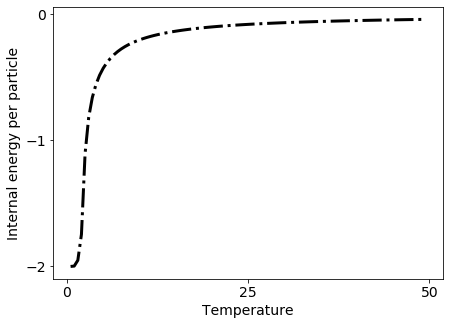

In [34]:
J = 1.0
T, E = c.onsager(J)
c.plt_onsager(T, E)

In [45]:
E_array = np.zeros_like(T, float)
print(T.shape)
for k in range(T.shape[-1]):
    Temp = T[k]
    E_array[k] = c.get_Q_and_E(Temp, 1.0, 0.0, lattices)[1]

(99,)


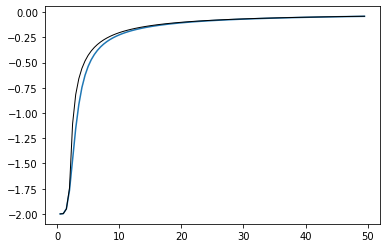

In [48]:
plt.plot(T, -2 * E_array / np.min(E_array))
plt.plot(T, E, "black", lw=1)
plt.show()